<a href="https://colab.research.google.com/github/Shubh-17-am/Iris-Classification-/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

#Step 2 Load Data


In [2]:
(X_train, y_train), (X_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:



# Print the shape of data

In [3]:

X_train.shape,y_train.shape, "****************", X_test.shape,y_test.shape

((60000, 28, 28), (60000,), '****************', (10000, 28, 28), (10000,))

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [5]:
y_train[0]

9

In [6]:
class_labels = [	"T-shirt/top","Trouser",	"Pullover","Dress","Coat", "Sandal", "Shirt",	"Sneaker", "Bag","Ankle boot"]

In [7]:
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
# show image

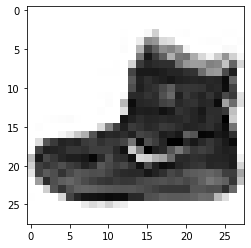

In [9]:
plt.imshow(X_train[0], cmap='Greys')

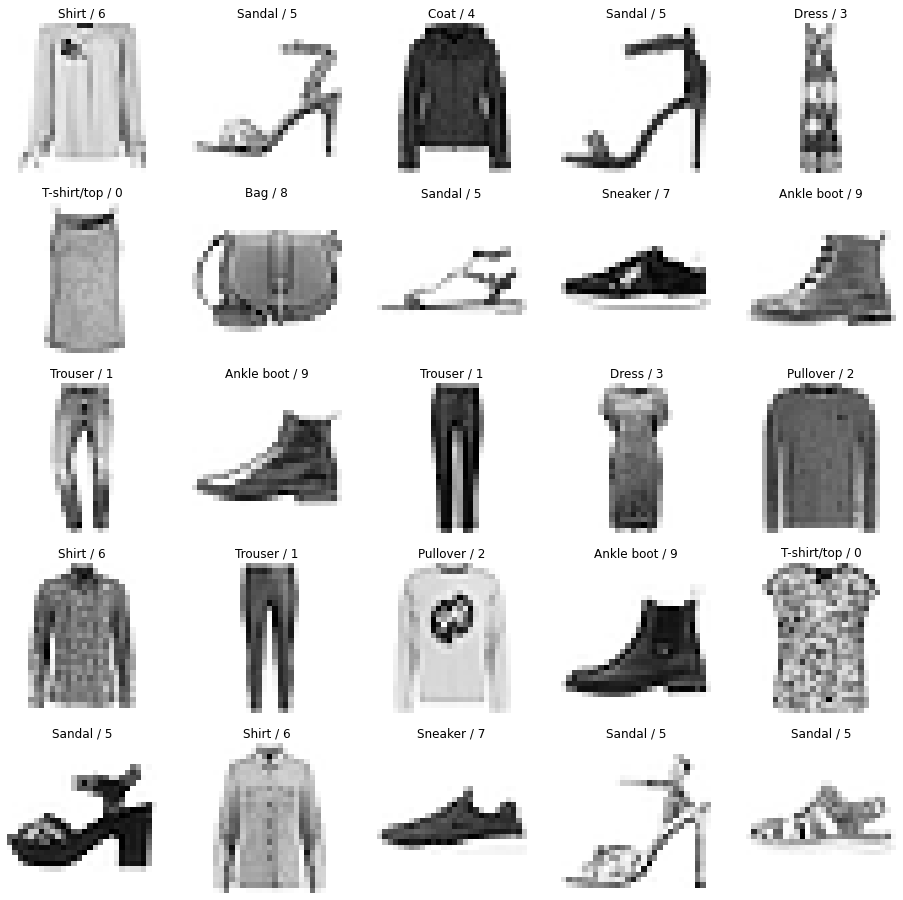

In [10]:
plt.figure(figsize=(16,16))

j=1 
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(X_train[i],cmap='Greys')
  plt.axis('off')
  plt.title('{} / {}' .format(class_labels[y_train[i]],y_train[i]))

In [11]:
X_train.ndim

3

In [12]:
X_train = np.expand_dims(X_train,-1)

In [13]:
X_train.ndim

4

In [14]:

x_test=np.expand_dims(X_test,-1)

In [15]:
# feature scaling

In [16]:
X_train = X_train/255
X_test= X_test/255

In [17]:
# Split dataset

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_Validation,y_train,y_Validation=train_test_split(X_train,y_train,test_size=0.2,random_state=2020)

In [19]:
X_train.shape,X_Validation.shape,y_train.shape,y_Validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

# Step 3) Building the CNN model

In [20]:
model = keras.models.Sequential([
                          keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),
                          keras.layers.Flatten(),
                          keras.layers.Dense(units=128,activation='relu'),                                       
                          keras.layers.Dense(units=10,activation='softmax')        
])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [22]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [23]:
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_Validation,y_Validation))

Epoch 1/10
94/94 [==============================] - 46s 456ms/step - loss: 0.6120 - accuracy: 0.7960 - val_loss: 0.4663 - val_accuracy: 0.8322
Epoch 2/10
94/94 [==============================] - 26s 272ms/step - loss: 0.3791 - accuracy: 0.8672 - val_loss: 0.3656 - val_accuracy: 0.8743
Epoch 3/10
94/94 [==============================] - 25s 268ms/step - loss: 0.3300 - accuracy: 0.8848 - val_loss: 0.3453 - val_accuracy: 0.8791
Epoch 4/10
94/94 [==============================] - 26s 273ms/step - loss: 0.3001 - accuracy: 0.8939 - val_loss: 0.3139 - val_accuracy: 0.8913
Epoch 5/10
94/94 [==============================] - 29s 309ms/step - loss: 0.2786 - accuracy: 0.9014 - val_loss: 0.3082 - val_accuracy: 0.8920
Epoch 6/10
94/94 [==============================] - 26s 279ms/step - loss: 0.2656 - accuracy: 0.9052 - val_loss: 0.3015 - val_accuracy: 0.8958
Epoch 7/10
94/94 [==============================] - 26s 274ms/step - loss: 0.2519 - accuracy: 0.9112 - val_loss: 0.3038 - val_accuracy: 0.8923

In [24]:

y_pred = model.predict(X_test)
y_pred.round(2)

313/313 [==============================] - 2s 6ms/step


array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.07, 0.05, 0.  ]], dtype=float32)

In [25]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [26]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 69.3143 - accuracy: 0.8351


[69.31433868408203, 0.835099995136261]

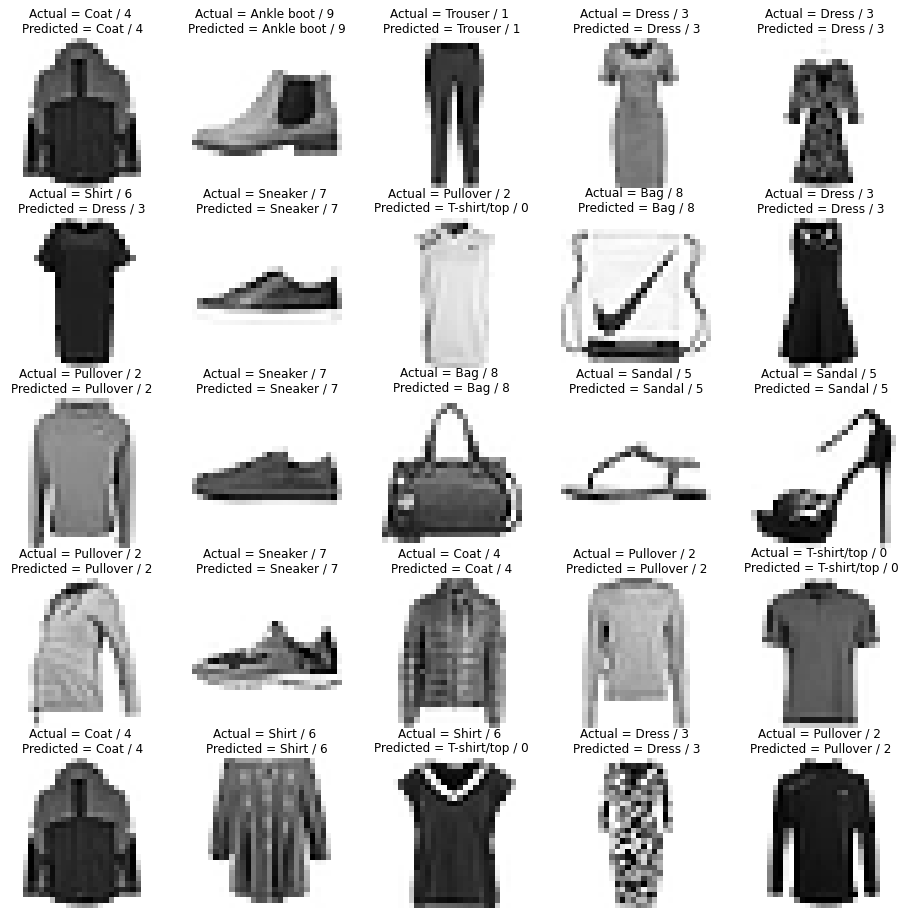

In [27]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(X_test[i].reshape(28,28),cmap='Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')
                                                                                                                                             

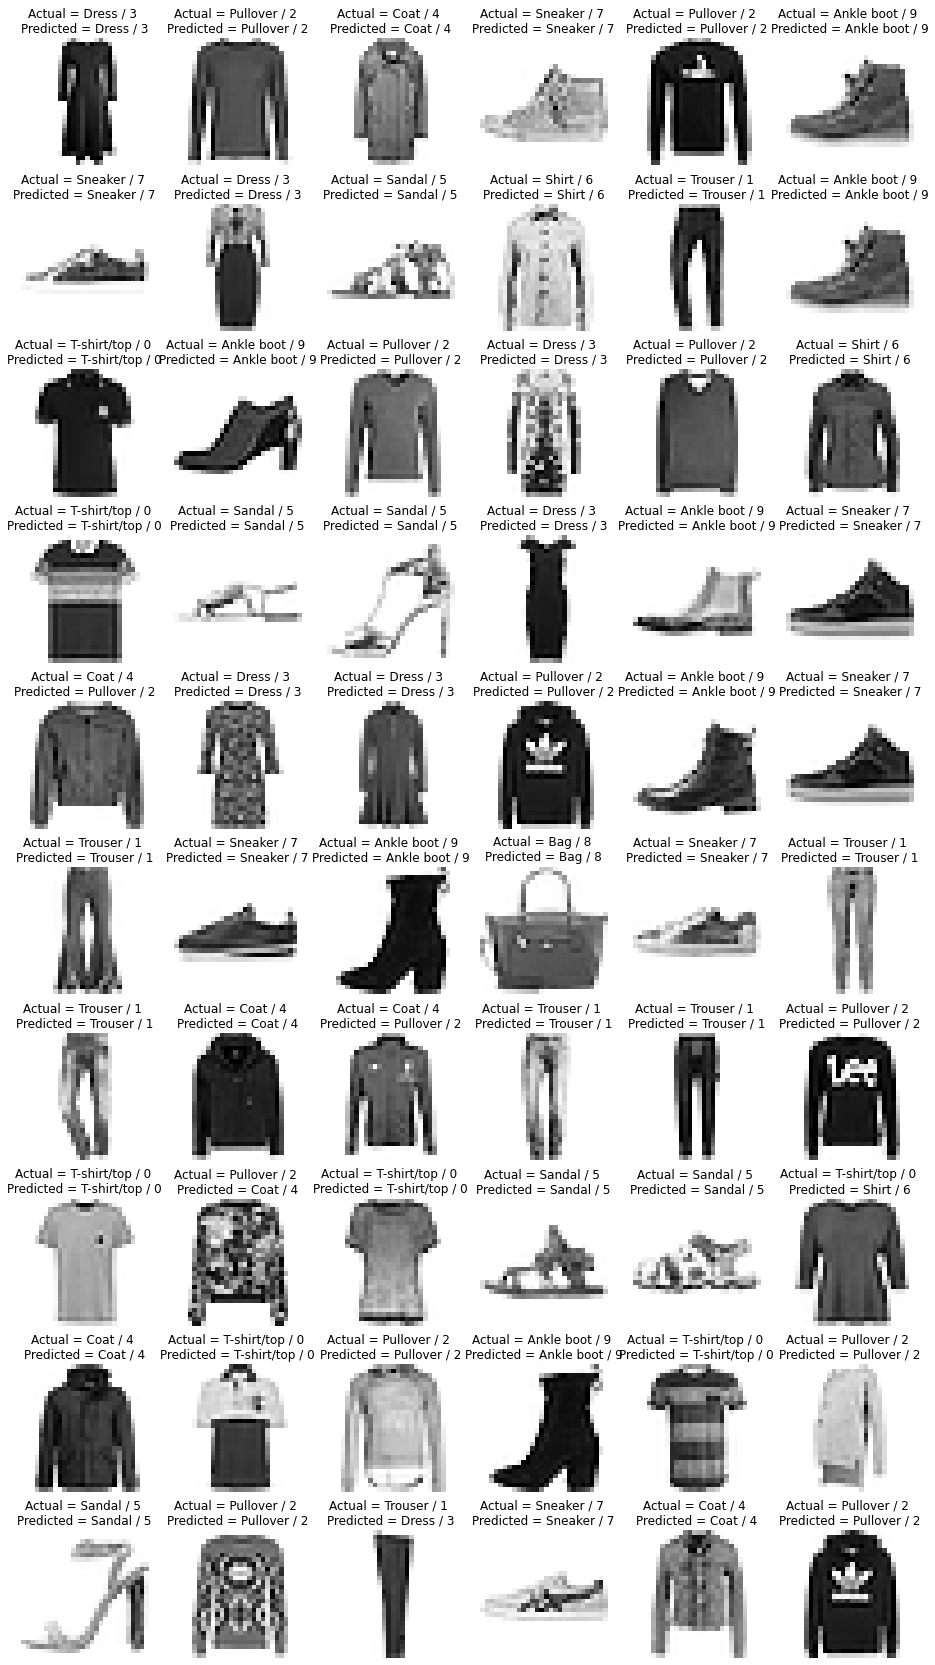

In [28]:

plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0,1000,60):
  plt.subplot(10,6,j); j+=1
  plt.imshow(X_test[i].reshape(28,28),cmap='Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

In [29]:
"""## Confusion Matrix"""

'## Confusion Matrix'

In [30]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

<Figure size 1152x648 with 0 Axes>

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1000
           1       0.98      0.98      0.98      1000
           2       0.83      0.87      0.85      1000
           3       0.90      0.90      0.90      1000
           4       0.84      0.87      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.79      0.64      0.71      1000
           7       0.96      0.95      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



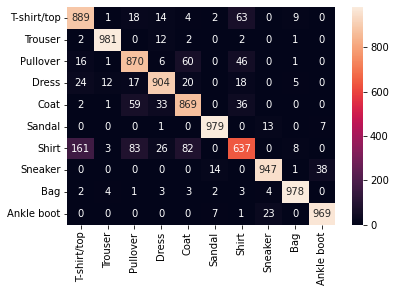

In [31]:
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)

from sklearn.metrics import classification_report
cr=classification_report(y_test, y_pred_labels)
print(cr)

In [32]:
""" # Save  Model"""

' # Save  Model'

In [33]:
model.save('fashion_mnist_cnn_models.h5')

In [34]:
cnn_model12 = keras.models.Sequential([
    
                           keras.layers.Conv2D(filters=32, kernel_size=3,strides=(1,1), padding='valid', activation= 'relu', input_shape=[28,28,1]),
                           keras.layers.MaxPooling2D(pool_size=(2,2)),
                           keras.layers.Conv2D(filters=64,kernel_size=3,strides=(2,2),padding='same',activation='relu'),
                           keras.layers.MaxPooling2D(pool_size=(2,2)),
                           keras.layers.Flatten(),
                           keras.layers.Dense(units=128,activation='relu'),
                           keras.layers.Dropout(0.25),
                           keras.layers.Dense(units=256,activation='relu'),
                           keras.layers.Dropout(0.25),
                           keras.layers.Dense(units=128, activation='relu'),
                           keras.layers.Dense(units=10, activation='softmax')
                           ])
cnn_model12.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

cnn_model12.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))

cnn_model12.save('fashion_mnist_cnn_model2.h5')

Epoch 1/20
94/94 [==============================] - 33s 341ms/step - loss: 1.0196 - accuracy: 0.6205 - val_loss: 0.5886 - val_accuracy: 0.7690
Epoch 2/20
94/94 [==============================] - 31s 332ms/step - loss: 0.5528 - accuracy: 0.7904 - val_loss: 0.4594 - val_accuracy: 0.8207
Epoch 3/20
94/94 [==============================] - 32s 339ms/step - loss: 0.4680 - accuracy: 0.8276 - val_loss: 0.4144 - val_accuracy: 0.8496
Epoch 4/20
94/94 [==============================] - 33s 346ms/step - loss: 0.4037 - accuracy: 0.8527 - val_loss: 0.3636 - val_accuracy: 0.8632
Epoch 5/20
94/94 [==============================] - 32s 340ms/step - loss: 0.3655 - accuracy: 0.8680 - val_loss: 0.3465 - val_accuracy: 0.8689
Epoch 6/20
94/94 [==============================] - 33s 349ms/step - loss: 0.3399 - accuracy: 0.8771 - val_loss: 0.3208 - val_accuracy: 0.8827
Epoch 7/20
94/94 [==============================] - 31s 327ms/step - loss: 0.3204 - accuracy: 0.8836 - val_loss: 0.3154 - val_accuracy: 0.8864

In [35]:


"""######## very complex model"""

#Building CNN model
cnn_model13 = keras.models.Sequential([
    
                           keras.layers.Conv2D(filters=64, kernel_size=3 ,strides=(1,1), padding='valid', activation= 'relu', input_shape=[28,28,1]),
                           keras.layers.MaxPooling2D(pool_size=(2,2)),
                           keras.layers.Conv2D(filters=128,kernel_size=3,strides=(2,2),padding='same',activation='relu'),
                           keras.layers.MaxPooling2D(pool_size=(2,2)),
                           keras.layers.Conv2D(filters=64, kernel_size=3,strides=(2,2),padding='same',activation='relu'),
                           keras.layers.MaxPooling2D(pool_size=(2,2)),
                           keras.layers.Flatten(),
                           keras.layers.Dense(units=128,activation='relu'),
                           keras.layers.Dropout(0.25),
                           keras.layers.Dense(units=256,activation='relu'),
                           keras.layers.Dropout(0.5),
                           keras.layers.Dense(units=256, activation='relu'),
                           keras.layers.Dropout(0.25),
                           keras.layers.Dense(units=126, activation='relu'),
                           keras.layers.Dropout(0.10),
                           keras.layers.Dense(units=10, activation='softmax')
                           ])
cnn_model13.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

cnn_model13.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))

cnn_model13.save('fashion_mnist_cnn_model3.h5')
cnn_model13.evaluate(x_test, y_test)

Epoch 1/20
94/94 [==============================] - 73s 765ms/step - loss: 1.1871 - accuracy: 0.5298 - val_loss: 0.6062 - val_accuracy: 0.7618
Epoch 2/20
94/94 [==============================] - 72s 762ms/step - loss: 0.5825 - accuracy: 0.7807 - val_loss: 0.4825 - val_accuracy: 0.8087
Epoch 3/20
94/94 [==============================] - 78s 836ms/step - loss: 0.4821 - accuracy: 0.8189 - val_loss: 0.4266 - val_accuracy: 0.8397
Epoch 4/20
94/94 [==============================] - 71s 760ms/step - loss: 0.4247 - accuracy: 0.8443 - val_loss: 0.3706 - val_accuracy: 0.8664
Epoch 5/20
94/94 [==============================] - 72s 757ms/step - loss: 0.3773 - accuracy: 0.8664 - val_loss: 0.3330 - val_accuracy: 0.8786
Epoch 6/20
94/94 [==============================] - 71s 759ms/step - loss: 0.3400 - accuracy: 0.8803 - val_loss: 0.3144 - val_accuracy: 0.8880
Epoch 7/20
94/94 [==============================] - 72s 764ms/step - loss: 0.3099 - accuracy: 0.8899 - val_loss: 0.3046 - val_accuracy: 0.8921

[53.91525650024414, 0.7929999828338623]